In [2]:
# -----------------------------------------
# 📦 1. Import Libraries
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    roc_auc_score, roc_curve
)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# -----------------------------------------
# 📁 2. Load and Inspect the Dataset
# -----------------------------------------
df = pd.read_csv('Churn_Modelling.csv')
print(df.shape)
df.head()

(10002, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
# -----------------------------------------
# 🔍 3. Data Overview
# -----------------------------------------
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# -----------------------------------------
# 🧹 4. Data Cleaning
# -----------------------------------------
df.dropna(inplace=True)  # Remove rows with missing values
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)  # Drop non-predictive columns

In [6]:
# -----------------------------------------
# 🔄 5. Encoding & Feature Engineering
# -----------------------------------------
# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encode Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [7]:
# -----------------------------------------
# 📏 6. Feature Scaling
# -----------------------------------------
scaler = StandardScaler()
scale_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("Data after Scaled Features:")
df[scale_cols].head()

Data after Scaled Features:


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.326298,0.293657,-1.041838,-1.225860,-0.911570,0.021720
1,-0.440137,0.198305,-1.387619,0.117428,-0.911570,0.216366
2,-1.537125,0.293657,1.032846,1.333214,2.526981,0.240519
3,0.501618,0.007601,-1.387619,-1.225860,0.807705,-0.109083
5,-0.057226,0.484361,1.032846,0.597439,0.807705,0.863478


In [8]:
# -----------------------------------------
# 🧪 7. Split the Data
# -----------------------------------------
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print (f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (7998, 11), Test shape: (2000, 11)


In [15]:
# -----------------------------------------
# 🌲 8. Random Forest Classifier
# -----------------------------------------
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8585
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1592
           1       0.74      0.47      0.57       408

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



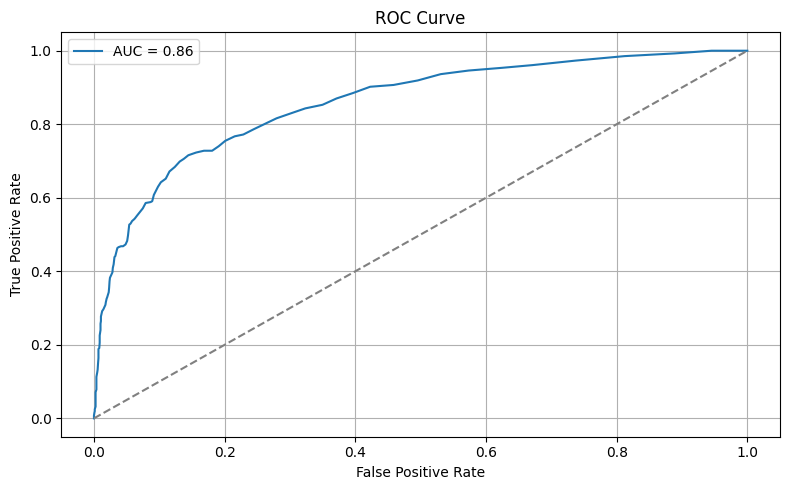

In [16]:
# -----------------------------------------
# 📈 9. ROC Curve - Random Forest
# -----------------------------------------
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

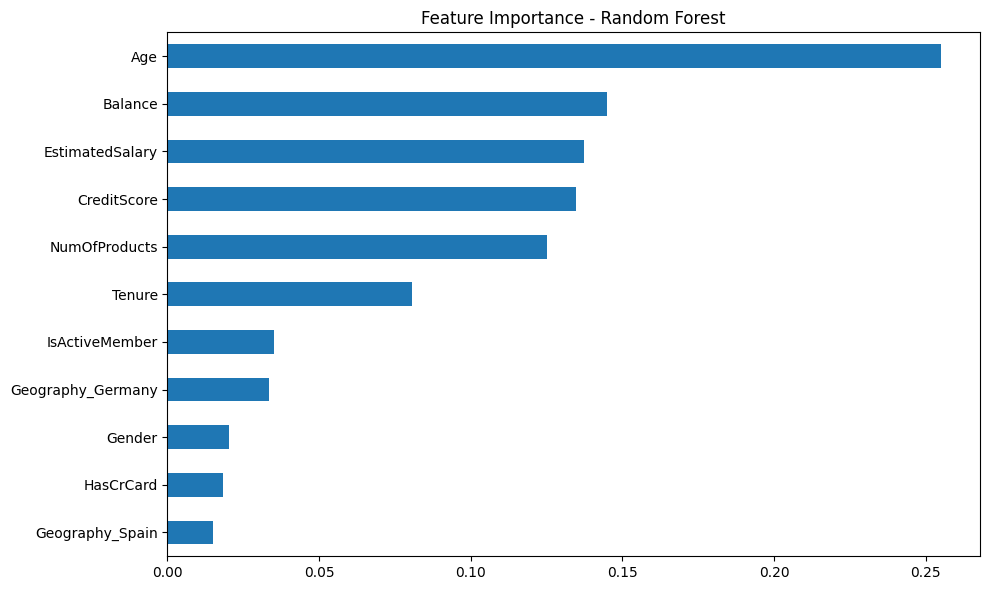

In [17]:
# -----------------------------------------
# 📊 10. Feature Importance
# -----------------------------------------
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [18]:
# -----------------------------------------
# 🤖 11. Logistic Regression (Optional Model)
# -----------------------------------------
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_log_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_log_pred))
print(classification_report(y_test, y_log_pred))

Logistic Regression Accuracy: 0.7055
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1592
           1       0.38      0.71      0.50       408

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.71      0.73      2000



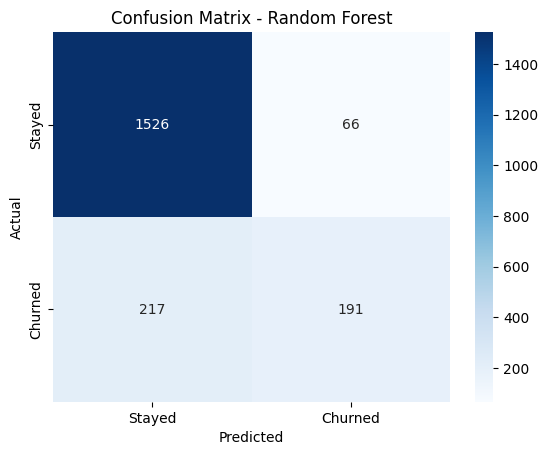

In [19]:
# -----------------------------------------
# 🔵 12. Confusion Matrix - Visual
# -----------------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

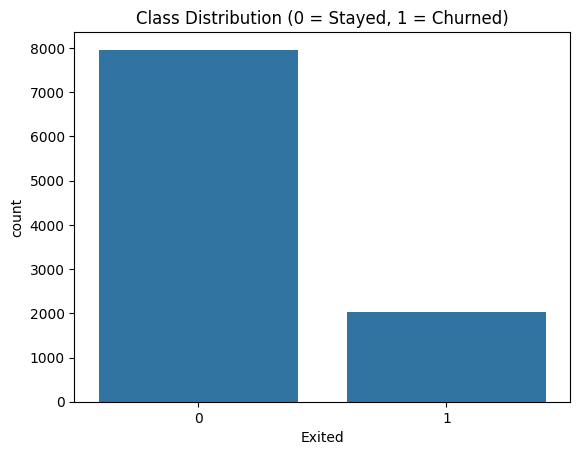

In [20]:
# -----------------------------------------
# 📊 13. Class Distribution Plot
# -----------------------------------------
sns.countplot(x='Exited', data=df)
plt.title("Class Distribution (0 = Stayed, 1 = Churned)")
plt.show()

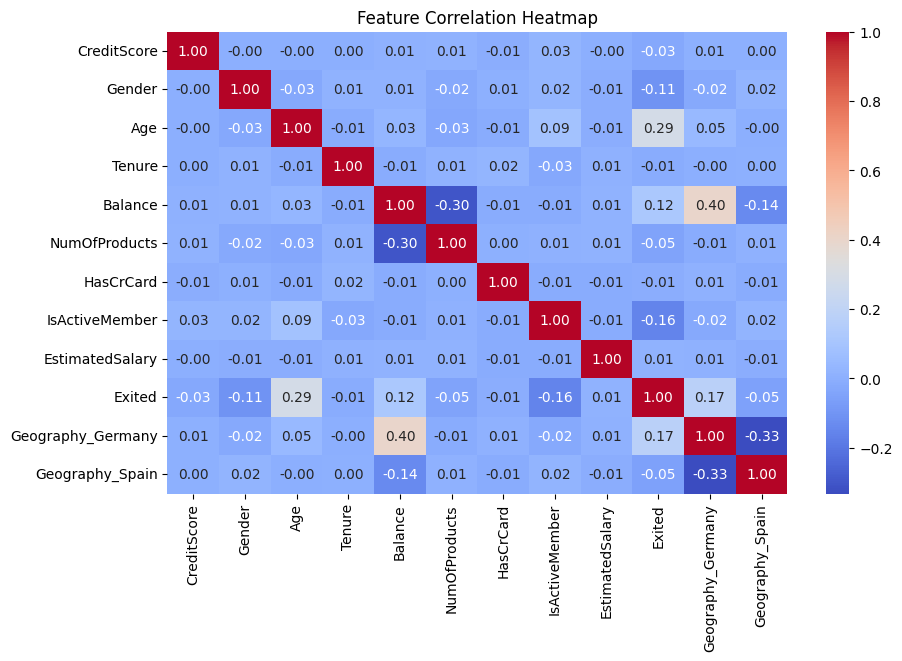

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()